<a href="https://colab.research.google.com/github/antonellafontanetto/Exportaciones_YPF/blob/main/ExportacionesdeYPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap


In [3]:
exportaciones = pd.read_csv('/content/importaciones-exportaciones-a-partir-del-2016- - copia.zip',usecols=['anio','mes','empresa','tipodecomercializacion','producto','unidad','provincia','cantidad','monto','pais'])
exportaciones


,anio,mes,empresa,tipodecomercializacion,producto,unidad,provincia,cantidad,monto,pais
0,2016,1,OILSTONE ENERGIA S.A.,Exportación,Gasolina Natural(m3),(m3),S/D,0.0,0.0,no aplica
1,2016,1,WENTEN S.R.L.,Importación,Aerokerosene (Jet)(m3),(m3),no aplica,0.0,0.0,no aplica
2,2016,1,OILSTONE ENERGIA S.A.,Exportación,Lubricantes automotrices(m3),(m3),S/D,0.0,0.0,no aplica
3,2016,1,PLUSPETROL S.A.,Importación,Gas Natural(miles/m3),(miles/m3),no aplica,0.0,0.0,no aplica
4,2016,1,OILSTONE ENERGIA S.A.,Exportación,Fueloil(Ton),(Ton),S/D,0.0,0.0,no aplica
...,...,...,...,...,...,...,...,...,...,...
1179887,2025,3,COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.,Exportación,Lubricantes industriales(m3),(m3),no aplica,0.0,0.0,ESTADOS UNIDOS
1179888,2025,3,Compañía Mega S.A.,Exportación,Asfaltos(Ton),(Ton),no aplica,0.0,0.0,BRASIL
1179889,2025,3,PAMPA ENERGIA S.A.,Exportación,Butano y Otros C4(Ton),(Ton),no aplica,0.0,0.0,CHILE
1179890,2025,3,Trafigura Argentina S.A.,Exportación,Solventes Hexano(m3),(m3),no aplica,0.0,0.0,PARAGUAY


In [4]:
exportaciones.columns

Index(['anio', 'mes', 'empresa', 'tipodecomercializacion', 'producto',
       'unidad', 'provincia', 'cantidad', 'monto', 'pais'],
      dtype='object')

In [5]:
exportaciones['provincia'].unique()

array(['S/D', 'no aplica', 'Neuquén', 'Santa Cruz', 'Chubut', 'Rio Negro',
       'Tierra del Fuego', 'Buenos Aires', 'Catamarca', 'Salta',
       'Capital Federal', 'San Juan', 'La Rioja', 'San Luis', 'Chaco',
       'Santiago del Estero', 'Entre Rios', 'Formosa', 'Misiones',
       'Mendoza', 'La Pampa', 'Tucuman', 'Santa Fe', 'Jujuy',
       'Corrientes', 'Córdoba'], dtype=object)

In [9]:
exportaciones['anio'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [14]:
exportaciones.dtypes

,0
anio,int64
mes,int64
empresa,object
tipodecomercializacion,object
producto,object
unidad,object
provincia,object
cantidad,float64
monto,float64
pais,object


In [8]:
sorted(exportaciones['empresa'].dropna().unique())

['APACHE ENERGIA ARGENTINA S.R.L.',
 'APACHE PETROLERA ARGENTINA S.A.',
 'Administracion del Interior',
 'BRAVO ENERGY ARGENTINA S.C.A.',
 'BRUERRE-EME',
 'CAMMESA',
 'CAPEX S.A.',
 'CARBOCLOR S.A.',
 'CEREALES DON NINO S.A.',
 'CGC ENERGIA SAU',
 'COMBUSTIBLES ARGENTINOS',
 'COMBUSTIBLES ITALO ARGENTINO SA',
 'COMBUSTIBLES Y ENERGIA S.A.',
 'COMPAÑIA DE HIDROCARBURO NO CONVENCIONAL S.R.L.',
 'COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.',
 'Compañía Mega S.A.',
 'DAPETROL S.A.',
 'DeltaPatagonia S.A.',
 'Destilería Argentina de Petróleo S.A.',
 'ENAP SIPETROL ARGENTINA S.A.',
 'ENARSA ENERGIA ARGENTINA S.A.',
 'ENERGEN S.A.',
 'ENERGIA DERIVADOS DEL PETROLEO S.A.',
 'ENERGIA Y SOLUCIONES S.A.',
 'ENERGY CONSULTING SERVICES S.A. ',
 'ESSO S.A.P.A.',
 'ESTANDAR ENERGY S.A.',
 'EXXONMOBIL EXPLORATION ARGENTINA S.R.L.',
 'Energy PIA Group S.A.',
 'FERCOL Lubricantes',
 'FOX PETROL S.A.',
 'FUCHS ARGENTINA S.A.',
 'GRASTA PETROL',
 'GULF OIL ARGENTINA S.A.',
 'INGENIERIA AMBIENTAL S.A.',
 'INTERL

In [18]:
exportaciones['tipodecomercializacion'].unique()

array(['Exportación', 'Importación'], dtype=object)

In [20]:
sorted(exportaciones['producto'].dropna().unique())

['Aerokerosene (Jet)(m3)',
 'Aeronaftas(m3)',
 'Aguarras(m3)',
 'Asfaltos(Ton)',
 'Bases Lubricantes(m3)',
 'Butano y Otros C4(Ton)',
 'Coque(Ton)',
 'Crudo importado(m3)',
 'Cuenca Austral - Santa Cruz - Off Shore(m3)',
 'Cuenca Austral - Santa Cruz - On  Shore(m3)',
 'Cuenca Austral - Tierra l Fuego - Off Shore (Hidra)(m3)',
 'Cuenca Austral - Tierra l Fuego - On Shore (San Sebastián)(m3)',
 'Cuenca Cuyana y Bolsones(m3)',
 'Cuenca Golfo San Jorge - Chubut (Escalante)(m3)',
 'Cuenca Golfo San Jorge - Santa Cruz (Cañadón Seco)(m3)',
 'Cuenca Neuquina - La Pampa (Medanito)(m3)',
 'Cuenca Neuquina - Mendoza(m3)',
 'Cuenca Neuquina - Neuquen (Medanito)(m3)',
 'Cuenca Neuquina - Rio Negro (Medanito)(m3)',
 'Cuenca Noroeste - Formosa(m3)',
 'Cuenca Noroeste - Jujuy(m3)',
 'Cuenca Noroeste - Salta(m3)',
 'Destilado de Vacío(m3)',
 'Diesel Oil(m3)',
 'Fueloil(Ton)',
 'Gas Natural Licuado(miles/m3)',
 'Gas Natural(miles/m3)',
 'Gas de Refinería(miles/m3)',
 'Gasoil Grado 1 (Agrogasoil)(m3)',


In [25]:
exportaciones['unidad'].unique()

array(['(m3)', '(miles/m3)', '(Ton)'], dtype=object)

In [29]:
sorted(exportaciones['pais'].dropna().unique())

['AFGANISTAN',
 'ALBANIA',
 'ALEMANIA',
 'ANGOLA',
 'ANTIGUA & BARBUDA',
 'ANTILLAS HOLANDESAS',
 'ARABIA SAUDITA',
 'ARGELIA',
 'ARGENTINA',
 'AUSTRALIA',
 'BAHAMAS',
 'BAHRAIN',
 'BARBADOS',
 'BELGICA',
 'BELIZE',
 'BOLIVIA',
 'BRASIL',
 'CAMERUN',
 'CANADA',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 "COTE D'IVOIRE",
 'DINAMARCA',
 'ECUADOR',
 'EGIPTO',
 'EMIRATOS ARABES UN.',
 'ESPAÑA',
 'ESTADOS UNIDOS',
 'FILIPINAS',
 'FINLANDIA',
 'FRANCIA',
 'GHANA',
 'GRAN BRETAÑA',
 'GRECIA',
 'GUAYANA FRANCESA',
 'HOLANDA',
 'INDIA',
 'IRLANDA',
 'ISLAS VIRGENES (UK)',
 'ISLAS VIRGENES (USA)',
 'ITALIA',
 'JAMAICA',
 'JAPON',
 'KENYA',
 'KOREA DEL SUR',
 'KUWAIT',
 'LIBYA',
 'LITUANIA',
 'MADAGASCAR',
 'MALAYSIA',
 'MALTA',
 'MAURICIO',
 'MAURITANIA',
 'MEXICO',
 'MOROCCO',
 'MOZAMBIQUE',
 'NIGERIA',
 'NO IDENTIFICADO',
 'NORUEGA',
 'OMAN',
 'PANAMA',
 'PARAGUAY',
 'PERU',
 'PORTUGAL',
 'PUERTO RICO',
 'QATAR',
 'REPUBLICA DOMINICANA',
 'RUSIA',
 'SAINT KITTS - NEVIS',
 'SANTA LUCIA',
 'SAO TOME & PR

In [24]:
#Filtro por cada dataset solo los registros para YPF S.A.
exportaciones_ypf = exportaciones[(exportaciones['empresa'] == 'YPF S.A.')&(exportaciones['tipodecomercializacion'] == 'Exportación')&(exportaciones['anio']>2022)]

exportaciones_ypf


,anio,mes,empresa,tipodecomercializacion,producto,unidad,provincia,cantidad,monto,pais
966254,2023,1,YPF S.A.,Exportación,Solventes Hexano(m3),(m3),no aplica,0.000,0.0,BOLIVIA
966682,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,0.000,0.0,BOLIVIA
966690,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,697.000,398458.0,BRASIL
966694,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,464.000,512659.0,BRASIL
966702,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,0.000,0.0,BOLIVIA
...,...,...,...,...,...,...,...,...,...,...
1179872,2025,3,YPF S.A.,Exportación,Cuenca Golfo San Jorge - Chubut (Escalante)(m3),(m3),no aplica,0.000,0.0,KENYA
1179874,2025,3,YPF S.A.,Exportación,Nafta Grado 2 (Súper)(m3),(m3),no aplica,0.000,0.0,URUGUAY
1179879,2025,3,YPF S.A.,Exportación,Aeronaftas(m3),(m3),no aplica,0.000,0.0,HOLANDA
1179881,2025,3,YPF S.A.,Exportación,Lubricantes industriales(m3),(m3),no aplica,162.889,182385.0,CHILE


In [30]:
expo_ypf=exportaciones_ypf.rename(columns={'anio':'Año','mes':'Mes','empresa':'Empresa','tipodecomercializacion':'Tipo de Comercialización','producto':'Producto','unidad':'Unidad','provincia':'Provincia','cantidad':'Cantidad','monto':'Monto','pais':'País'})
expo_ypf

,Año,Mes,Empresa,Tipo de Comercialización,Producto,Unidad,Provincia,Cantidad,Monto,País
966254,2023,1,YPF S.A.,Exportación,Solventes Hexano(m3),(m3),no aplica,0.000,0.0,BOLIVIA
966682,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,0.000,0.0,BOLIVIA
966690,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,697.000,398458.0,BRASIL
966694,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,464.000,512659.0,BRASIL
966702,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,0.000,0.0,BOLIVIA
...,...,...,...,...,...,...,...,...,...,...
1179872,2025,3,YPF S.A.,Exportación,Cuenca Golfo San Jorge - Chubut (Escalante)(m3),(m3),no aplica,0.000,0.0,KENYA
1179874,2025,3,YPF S.A.,Exportación,Nafta Grado 2 (Súper)(m3),(m3),no aplica,0.000,0.0,URUGUAY
1179879,2025,3,YPF S.A.,Exportación,Aeronaftas(m3),(m3),no aplica,0.000,0.0,HOLANDA
1179881,2025,3,YPF S.A.,Exportación,Lubricantes industriales(m3),(m3),no aplica,162.889,182385.0,CHILE


In [31]:
expo_ypf.head()

,Año,Mes,Empresa,Tipo de Comercialización,Producto,Unidad,Provincia,Cantidad,Monto,País
966254,2023,1,YPF S.A.,Exportación,Solventes Hexano(m3),(m3),no aplica,0.0,0.0,BOLIVIA
966682,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,0.0,0.0,BOLIVIA
966690,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,697.0,398458.0,BRASIL
966694,2023,1,YPF S.A.,Exportación,Solventes Aromáticos(m3),(m3),no aplica,464.0,512659.0,BRASIL
966702,2023,1,YPF S.A.,Exportación,Solventes Alifáticos(m3),(m3),no aplica,0.0,0.0,BOLIVIA


In [32]:
expo_ypf.tail(10)

,Año,Mes,Empresa,Tipo de Comercialización,Producto,Unidad,Provincia,Cantidad,Monto,País
1179835,2025,3,YPF S.A.,Exportación,Otros Productos Pesados(m3),(m3),no aplica,0.000,0.0,CHINA
1179840,2025,3,YPF S.A.,Exportación,Lubricantes industriales(m3),(m3),no aplica,0.000,0.0,BRASIL
1179850,2025,3,YPF S.A.,Exportación,Cuenca Neuquina - Neuquen (Medanito)(m3),(m3),no aplica,0.000,0.0,KENYA
1179864,2025,3,YPF S.A.,Exportación,Otros Tipos de Gasoil(m3),(m3),no aplica,0.000,0.0,CHINA
1179867,2025,3,YPF S.A.,Exportación,Kerosene(m3),(m3),no aplica,0.000,0.0,BRASIL
1179872,2025,3,YPF S.A.,Exportación,Cuenca Golfo San Jorge - Chubut (Escalante)(m3),(m3),no aplica,0.000,0.0,KENYA
1179874,2025,3,YPF S.A.,Exportación,Nafta Grado 2 (Súper)(m3),(m3),no aplica,0.000,0.0,URUGUAY
1179879,2025,3,YPF S.A.,Exportación,Aeronaftas(m3),(m3),no aplica,0.000,0.0,HOLANDA
1179881,2025,3,YPF S.A.,Exportación,Lubricantes industriales(m3),(m3),no aplica,162.889,182385.0,CHILE
1179883,2025,3,YPF S.A.,Exportación,Cuenca Noroeste - Jujuy(m3),(m3),no aplica,0.000,0.0,KENYA


In [33]:
datosfaltantes=expo_ypf.isnull().sum()
datosfaltantes

,0
Año,0
Mes,0
Empresa,0
Tipo de Comercialización,0
Producto,0
Unidad,0
Provincia,0
Cantidad,0
Monto,0
País,0


In [44]:
expo_ypf.groupby(['Año','Mes','Producto'])[
    ['Cantidad','Monto']
].mean().round().astype(int)

Cantidad   Monto
Año  Mes Producto                                   
2023 1   Aerokerosene (Jet)(m3)            0       0
         Aeronaftas(m3)                    0       0
         Aguarras(m3)                     80   69006
         Asfaltos(Ton)                     0       0
         Bases Lubricantes(m3)             0       0
...                                      ...     ...
2025 3   Otros Tipos de Naftas(m3)         0       0
         Propano y Otros C3(Ton)         820  436163
         Solventes Alifáticos(m3)        114   56481
         Solventes Aromáticos(m3)        123   96990
         Solventes Hexano(m3)             35   24702

[1377 rows x 2 columns]

In [42]:
expo_ypf.groupby(['Año','Mes','Producto'])[
    ['Cantidad','Monto']
].sum().round().astype(int)

Cantidad    Monto
Año  Mes Producto                                    
2023 1   Aerokerosene (Jet)(m3)            0        0
         Aeronaftas(m3)                    0        0
         Aguarras(m3)                    480   414035
         Asfaltos(Ton)                     0        0
         Bases Lubricantes(m3)             0        0
...                                      ...      ...
2025 3   Otros Tipos de Naftas(m3)         0        0
         Propano y Otros C3(Ton)        6558  3489304
         Solventes Alifáticos(m3)       1257   621293
         Solventes Aromáticos(m3)       1358  1066893
         Solventes Hexano(m3)            385   271727

[1377 rows x 2 columns]

In [37]:
expo_ypf.groupby(['Año','Mes'])[
    ['Cantidad','Monto']
].mean().round().astype(int)

Cantidad   Monto
Año  Mes                  
2023 1         518  179822
     2         355  139639
     3         349  110299
     4         554  203220
     5         417  151250
     6         471  202787
     7         577  230158
     8         548  251909
     9         473  235960
     10        557  233169
     11        561  232527
     12        653  238252
2024 1         550  201905
     2         468  218738
     3         858  335598
     4         981  403590
     5        1060  507357
     6         757  309418
     7         865  388858
     8         992  402399
     9         906  350852
     10       1385  550513
     11        773  310251
     12        843  337692
2025 1         852  355379
     2         691  276906
     3         831  339609

In [38]:
expo_ypf.groupby(['Año','Mes'])[
    ['Cantidad','Monto']
].sum().round().astype(int)

Cantidad      Monto
Año  Mes                     
2023 1      134227   46573795
     2      162734   64094248
     3      124606   39376582
     4      169377   62185395
     5      127599   46282635
     6      144129   62052883
     7      176705   70428371
     8      195702   89931390
     9      144826   72203645
     10     198745   83241384
     11     229015   94871078
     12     266584   97206798
2024 1      280753  102971456
     2      190796   89245134
     3      306162  119808518
     4      300072  123498596
     5      270180  129375929
     6      309035  126242341
     7      308636  138822445
     8      303517  123134194
     9      415649  161040984
     10     288085  114506698
     11     354784  142405312
     12     387140  155000504
2025 1      304186  126870194
     2      317335  127099668
     3      349216  142635843

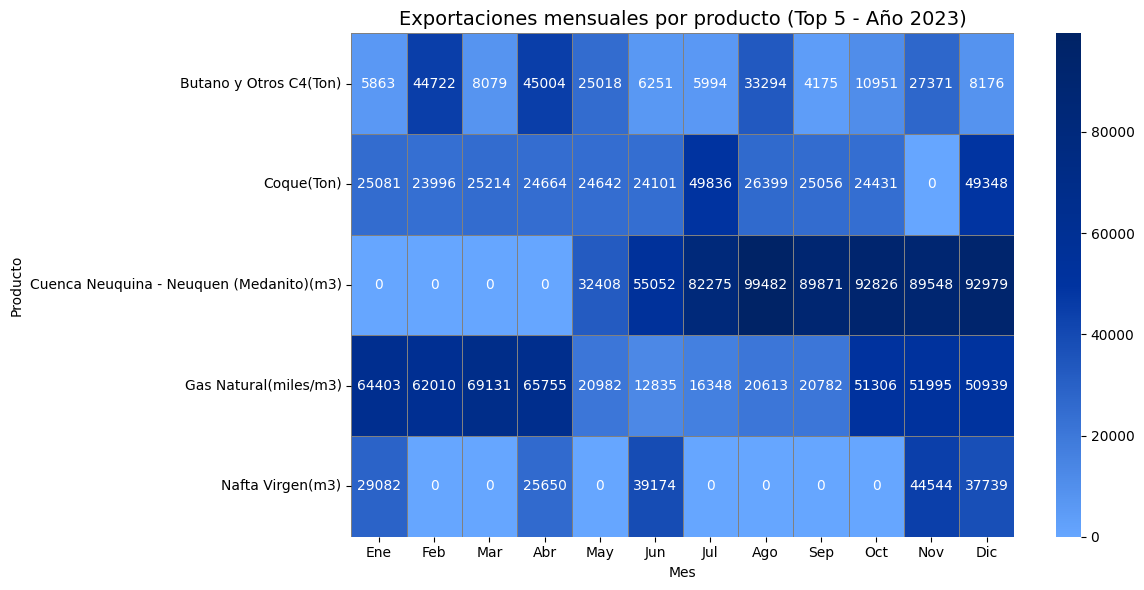

In [58]:
# Definir colormap invertido: celeste claro (bajo) → azul oscuro (alto)
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF", "#0033A0", "#002366"]
)

# Filtrar datos del año 2023
df_2023 = expo_ypf[expo_ypf['Año'] == 2023]

# Top 5 productos por cantidad en 2023
top5_productos = df_2023.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False).head(5).index

# Filtrar solo esos productos
df_top5 = df_2023[df_2023['Producto'].isin(top5_productos)]

# Crear tabla dinámica: Producto vs Mes
heatmap_data = df_top5.pivot_table(index='Producto', columns='Mes', values='Cantidad', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(columns=range(1, 13))  # Asegurar orden de meses
heatmap_data.columns = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear el heatmap con la paleta azul invertida
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap=ypf_blue_invert,
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Exportaciones mensuales por producto (Top 5 - Año 2023)', fontsize=14)
plt.ylabel('Producto')
plt.xlabel('Mes')
plt.tight_layout()
plt.show()

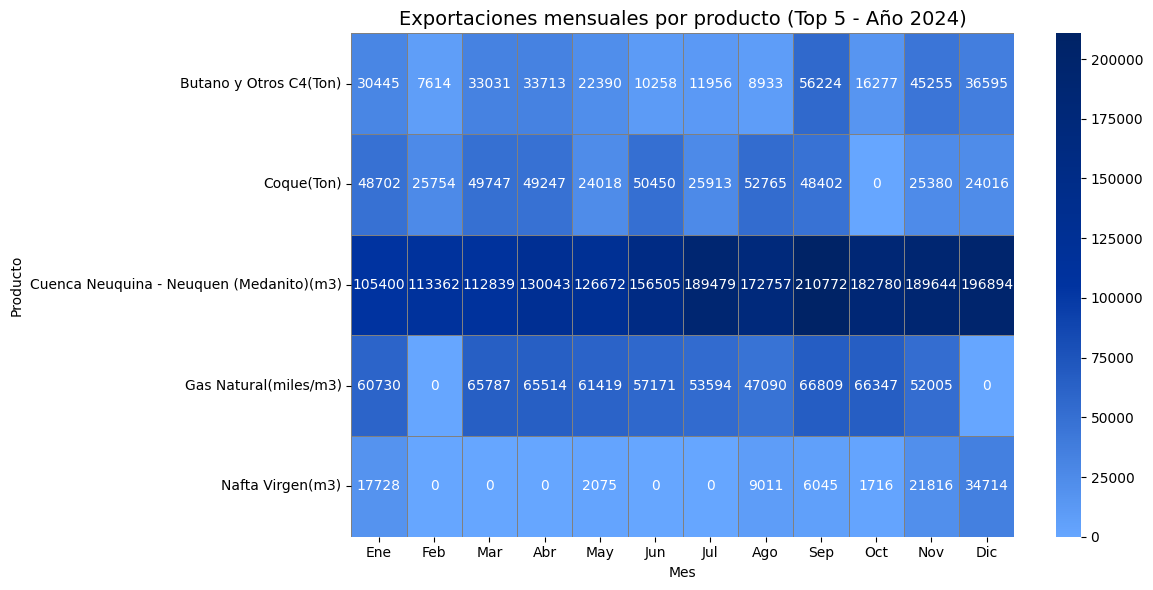

In [54]:
# Definir colormap invertido: celeste claro (bajo) → azul oscuro (alto)
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF", "#0033A0", "#002366"]
)

# Filtrar datos del año 2024
df_2024 = expo_ypf[expo_ypf['Año'] == 2024]

# Top 5 productos por cantidad en 2024
top5_productos = df_2024.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False).head(5).index

# Filtrar solo esos productos
df_top5 = df_2024[df_2024['Producto'].isin(top5_productos)]

# Crear tabla dinámica: Producto vs Mes
heatmap_data = df_top5.pivot_table(index='Producto', columns='Mes', values='Cantidad', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(columns=range(1, 13))  # Asegurar orden de meses
heatmap_data.columns = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear el heatmap con la nueva paleta
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap=ypf_blue_invert,
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Exportaciones mensuales por producto (Top 5 - Año 2024)', fontsize=14)
plt.ylabel('Producto')
plt.xlabel('Mes')
plt.tight_layout()
plt.show()

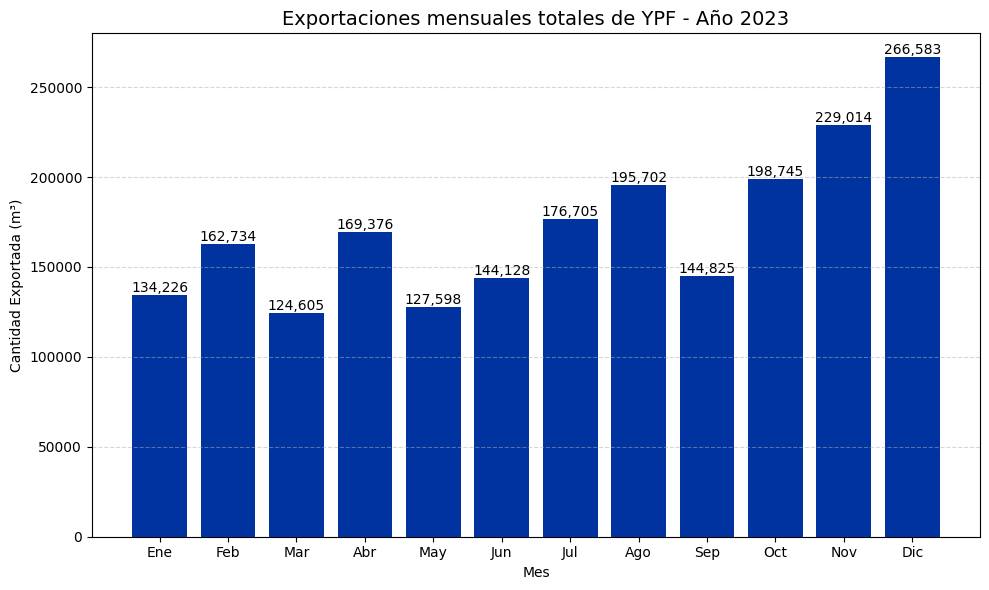

In [60]:
# Filtrar datos del año 2023
df_2023 = expo_ypf[expo_ypf['Año'] == 2023]

# Agrupar por mes y sumar cantidad exportada
exportaciones_mensuales = df_2023.groupby('Mes')['Cantidad'].sum().reindex(range(1, 13))

# Etiquetas de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Color azul YPF institucional
color_ypf = "#0033A0"

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(meses, exportaciones_mensuales, color=color_ypf)
plt.title('Exportaciones mensuales totales de YPF - Año 2023', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad Exportada (m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posición X (centro de la barra)
        altura,                            # posición Y (altura de la barra)
        f'{int(altura):,}',                # texto (formateado con separador de miles)
        ha='center',                      # alineación horizontal centrada
        va='bottom',                      # alineación vertical justo arriba de la barra
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

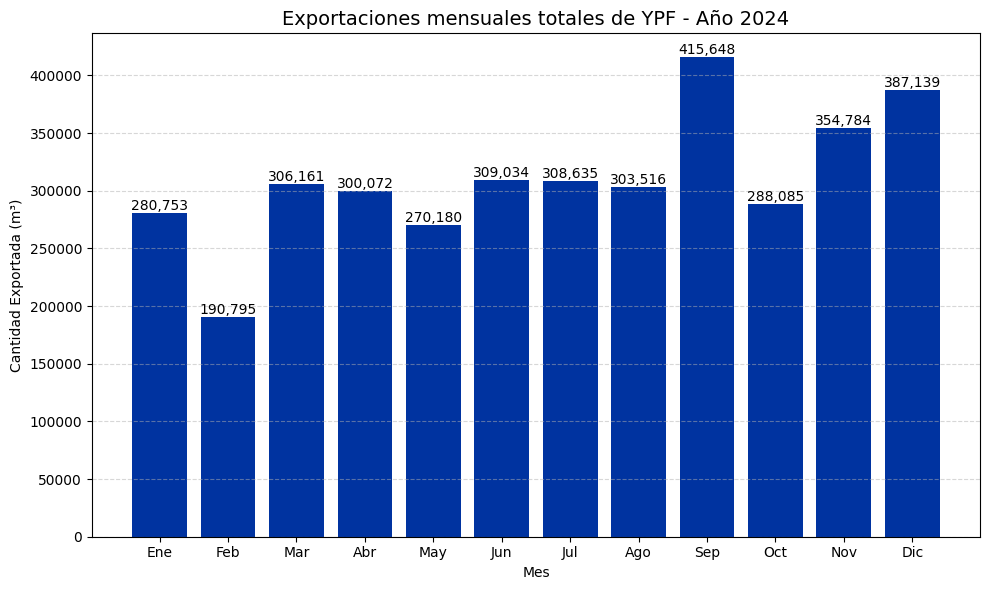

In [61]:
# Filtrar datos del año 2024
df_2024 = expo_ypf[expo_ypf['Año'] == 2024]

# Agrupar por mes y sumar cantidad exportada
exportaciones_mensuales = df_2024.groupby('Mes')['Cantidad'].sum().reindex(range(1, 13))

# Etiquetas de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Color azul YPF institucional
color_ypf = "#0033A0"

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(meses, exportaciones_mensuales, color=color_ypf)
plt.title('Exportaciones mensuales totales de YPF - Año 2024', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad Exportada (m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # centro de la barra
        altura,
        f'{int(altura):,}',                  # con separador de miles
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (12,).

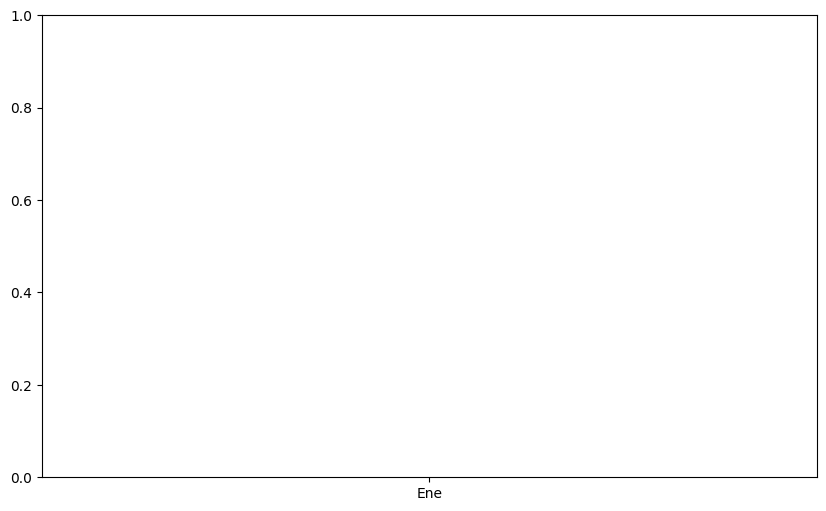

In [64]:
# Filtrar datos del año 2025
df_2025 = expo_ypf[expo_ypf['Año'] == 2025]

# Agrupar por mes y sumar cantidad exportada, rellenar meses sin datos con 0
exportaciones_mensuales = df_2025.groupby('Mes')['Cantidad'].sum().reindex(range(1, 13)).fillna(0)

# Etiquetas de meses
meses = ['Ene', 'Feb', 'Mar']

# Color azul YPF institucional
color_ypf = "#0033A0"

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(meses, exportaciones_mensuales, color=color_ypf)
plt.title('Exportaciones mensuales totales de YPF - Año 2025', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad Exportada (m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{int(altura):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

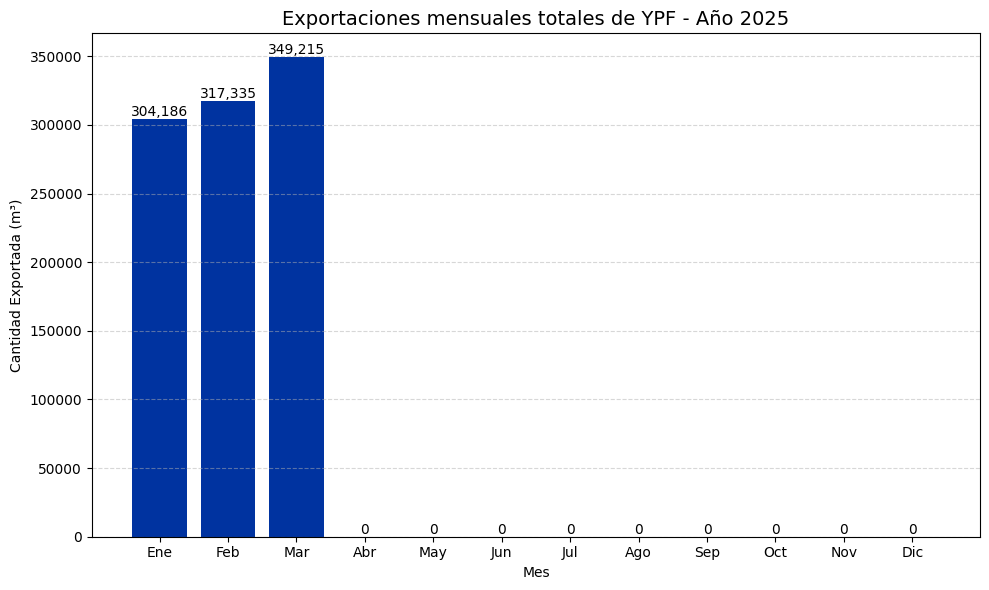

In [65]:
# Filtrar datos del año 2025
df_2025 = expo_ypf[expo_ypf['Año'] == 2025]

# Asegurarse que Mes es entero y válido
df_2025 = df_2025[df_2025['Mes'].between(1, 12)]

# Agrupar por mes y sumar cantidad exportada, rellenar meses sin datos con 0
exportaciones_mensuales = df_2025.groupby('Mes')['Cantidad'].sum().reindex(range(1, 13), fill_value=0)

# Etiquetas de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(meses, exportaciones_mensuales.values, color="#0033A0")
plt.title('Exportaciones mensuales totales de YPF - Año 2025', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad Exportada (m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{int(altura):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

<ipython-input-69-99c7708fa2ce>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


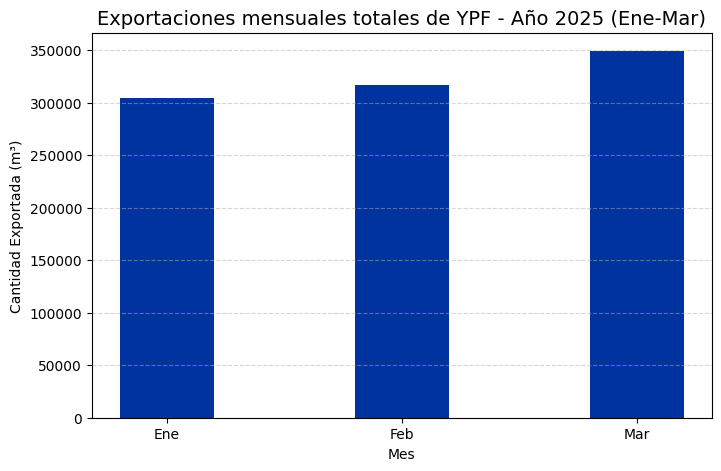

ValueError: Image size of 1320x134448166 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 800x500 with 1 Axes>

In [69]:
# Filtrar datos del año 2025 y meses hasta marzo (1 a 3)
df_2025 = expo_ypf[(expo_ypf['Año'] == 2025) & (expo_ypf['Mes'].between(1, 3))]

# Agrupar por mes y sumar cantidad exportada, rellenar meses faltantes con 0
exportaciones_mensuales = df_2025.groupby('Mes')['Cantidad'].sum().reindex(range(1, 4), fill_value=0)

# Etiquetas para los meses de enero a marzo
meses = ['Ene', 'Feb', 'Mar']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))  # ancho 8 pulgadas, alto 5 pulgadas
bars = plt.bar(meses, exportaciones_mensuales.values, color="#0033A0", width=0.4)
plt.title('Exportaciones mensuales totales de YPF - Año 2025 (Ene-Mar)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad Exportada (m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.figure(figsize=(8, 5))

# Agregar etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{int(altura):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

In [71]:
# Supongamos que tu DataFrame se llama expo_ypf y tiene al menos estas columnas:
# 'País' y 'Monto'

# Agrupar por país sumando el monto total de exportaciones
df_paises = expo_ypf.groupby('País', as_index=False)['Monto'].sum()

# Crear mapa de burbujas (scatter_geo)
fig = px.scatter_geo(
    df_paises,
    locations="País",          # usa nombres de países para geolocalizar
    locationmode='country names',
    size="Monto",              # tamaño de burbuja según monto
    hover_name="País",         # info al pasar el mouse
    projection="natural earth",
    title="Monto total de exportaciones por país",
    size_max=50                # tamaño máximo de burbuja
)

fig.show()

In [72]:
# Agrupar por país
df_paises = expo_ypf.groupby('País', as_index=False)['Monto'].sum()

# Crear una columna de texto con el país y el monto formateado
df_paises['Etiqueta'] = df_paises.apply(lambda row: f"{row['País']}: ${row['Monto']:,.0f}", axis=1)

# Crear el mapa
fig = px.scatter_geo(
    df_paises,
    locations="País",
    locationmode="country names",
    size="Monto",
    text="Etiqueta",           # <-- texto que aparece fijo sobre cada burbuja
    hover_name="País",
    projection="natural earth",
    title="Monto total de exportaciones por país",
    size_max=50
)

# Posición del texto: 'top center', 'bottom center', etc.
fig.update_traces(textposition='top center', textfont_size=10)

fig.show()

In [78]:
df_agrupado['Etiqueta'] = df_agrupado.apply(lambda row: f"{row['País']}\n${row['Monto']:,.0f}", axis=1)

fig = px.scatter_geo(
    df_agrupado,
    locations="País",
    locationmode="country names",
    size="Monto",
    text="Etiqueta",
    projection="natural earth",
    title="Monto total de exportaciones por país",
    size_max=50
)

fig.update_traces(
    marker=dict(color='rgba(0, 51, 160, 0.5)', line=dict(width=0.9, color='rgba(0,0,0,0.3)')),
    textposition='top center',
    textfont=dict(size=9)
)

fig.show()

In [79]:
# Filtrar solo países con exportaciones mayores a cero
df_exportaciones = expo_ypf[expo_ypf['Monto'] > 0]

# (Opcional) Filtrar por año, ej: 2024
# df_exportaciones = df_exportaciones[expo_ypf['Año'] == 2024]

# Agrupar por país
df_paises = df_exportaciones.groupby('País', as_index=False)['Monto'].sum()

# Crear gráfico
fig = px.scatter_geo(
    df_paises,
    locations="País",
    locationmode="country names",
    size="Monto",
    hover_name="País",
    hover_data={"Monto": ":,.0f"},
    projection="natural earth",
    title="Exportaciones YPF por país - Latinoamérica",
    size_max=40
)

# Estilo de burbujas: azul YPF con transparencia
fig.update_traces(marker=dict(
    color='rgba(0, 51, 160, 0.5)',
    line=dict(width=0.5, color='rgba(0,0,0,0.3)')
))

# Centrar el mapa en Latinoamérica
fig.update_geos(
    center=dict(lat=-15, lon=-65),
    projection_scale=1.2,  # zoom más cercano a LatAm (ajustá entre 0.8 y 1.5 según lo que quieras ver)
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="lightgray"
)

fig.show()


In [90]:
# Agrupar por país
df_agrupado = expo_ypf.groupby('País', as_index=False)['Monto'].sum()

# Etiquetas con país y monto
df_agrupado['Etiqueta'] = df_agrupado.apply(lambda row: f"{row['País']}\n${row['Monto']:,.0f}", axis=1)

# Crear gráfico
fig = px.scatter_geo(
    df_agrupado,
    locations="País",
    locationmode="country names",
    size="Monto",
    text="Etiqueta",
    projection="natural earth",
    title="Monto total de exportaciones por país (2023-2025)",
    size_max=50
)

# Burbujas azul YPF más fuerte y etiquetas azul negrita
fig.update_traces(
    marker=dict(
        color='rgba(0, 51, 160, 0.4)',  # azul YPF con más transparencia
        line=dict(width=0.9, color='rgba(0,0,0,0.3)')
    ),
    textposition='top center',
    textfont=dict(
        size=12,
        color='rgb(0, 51, 160)',  # mismo azul para el texto
        family="Arial Black"     # fuente más gruesa
    )
)

fig.update_layout(
    title=dict(
        text="Monto total de exportaciones por país",
        x=0.5,             # centra horizontalmente
        xanchor='center',
        font=dict(
            size=18,
            color='rgb(30, 30, 30)',  # gris oscuro, no tan negro
            family='Verdana'         # fuente más sobria que Arial Black
        )
    )
)



# Mapa más grande
fig.update_layout(
    height=800,
    width=1200,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()